## 1. 繪製 SWARM。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df_red = pd.read_csv("D:/Data Analysis/Python Data Science/ML100Days/Data/winequality-red.csv", sep=",")
df_white = pd.read_csv("D:/Data Analysis/Python Data Science/ML100Days/Data/winequality-white.csv", sep=",")

In [3]:
# Increase column
df_red["color"] = "R"
df_white["color"] = "W"

# Merge data
df_wine = pd.concat([df_red,df_white], axis=0)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [4]:
df_wine.rename(columns={'fixed acidity': 'fixed_acidity','citric acid':'citric_acid',
                        'volatile acidity':'volatile_acidity','residual sugar':'residual_sugar',
                        'free sulfur dioxide':'free_sulfur_dioxide',
                        'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,R
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,R
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,R
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,R


In [5]:
# Check null values
df = pd.get_dummies(df_wine, columns=["color"])
df_wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

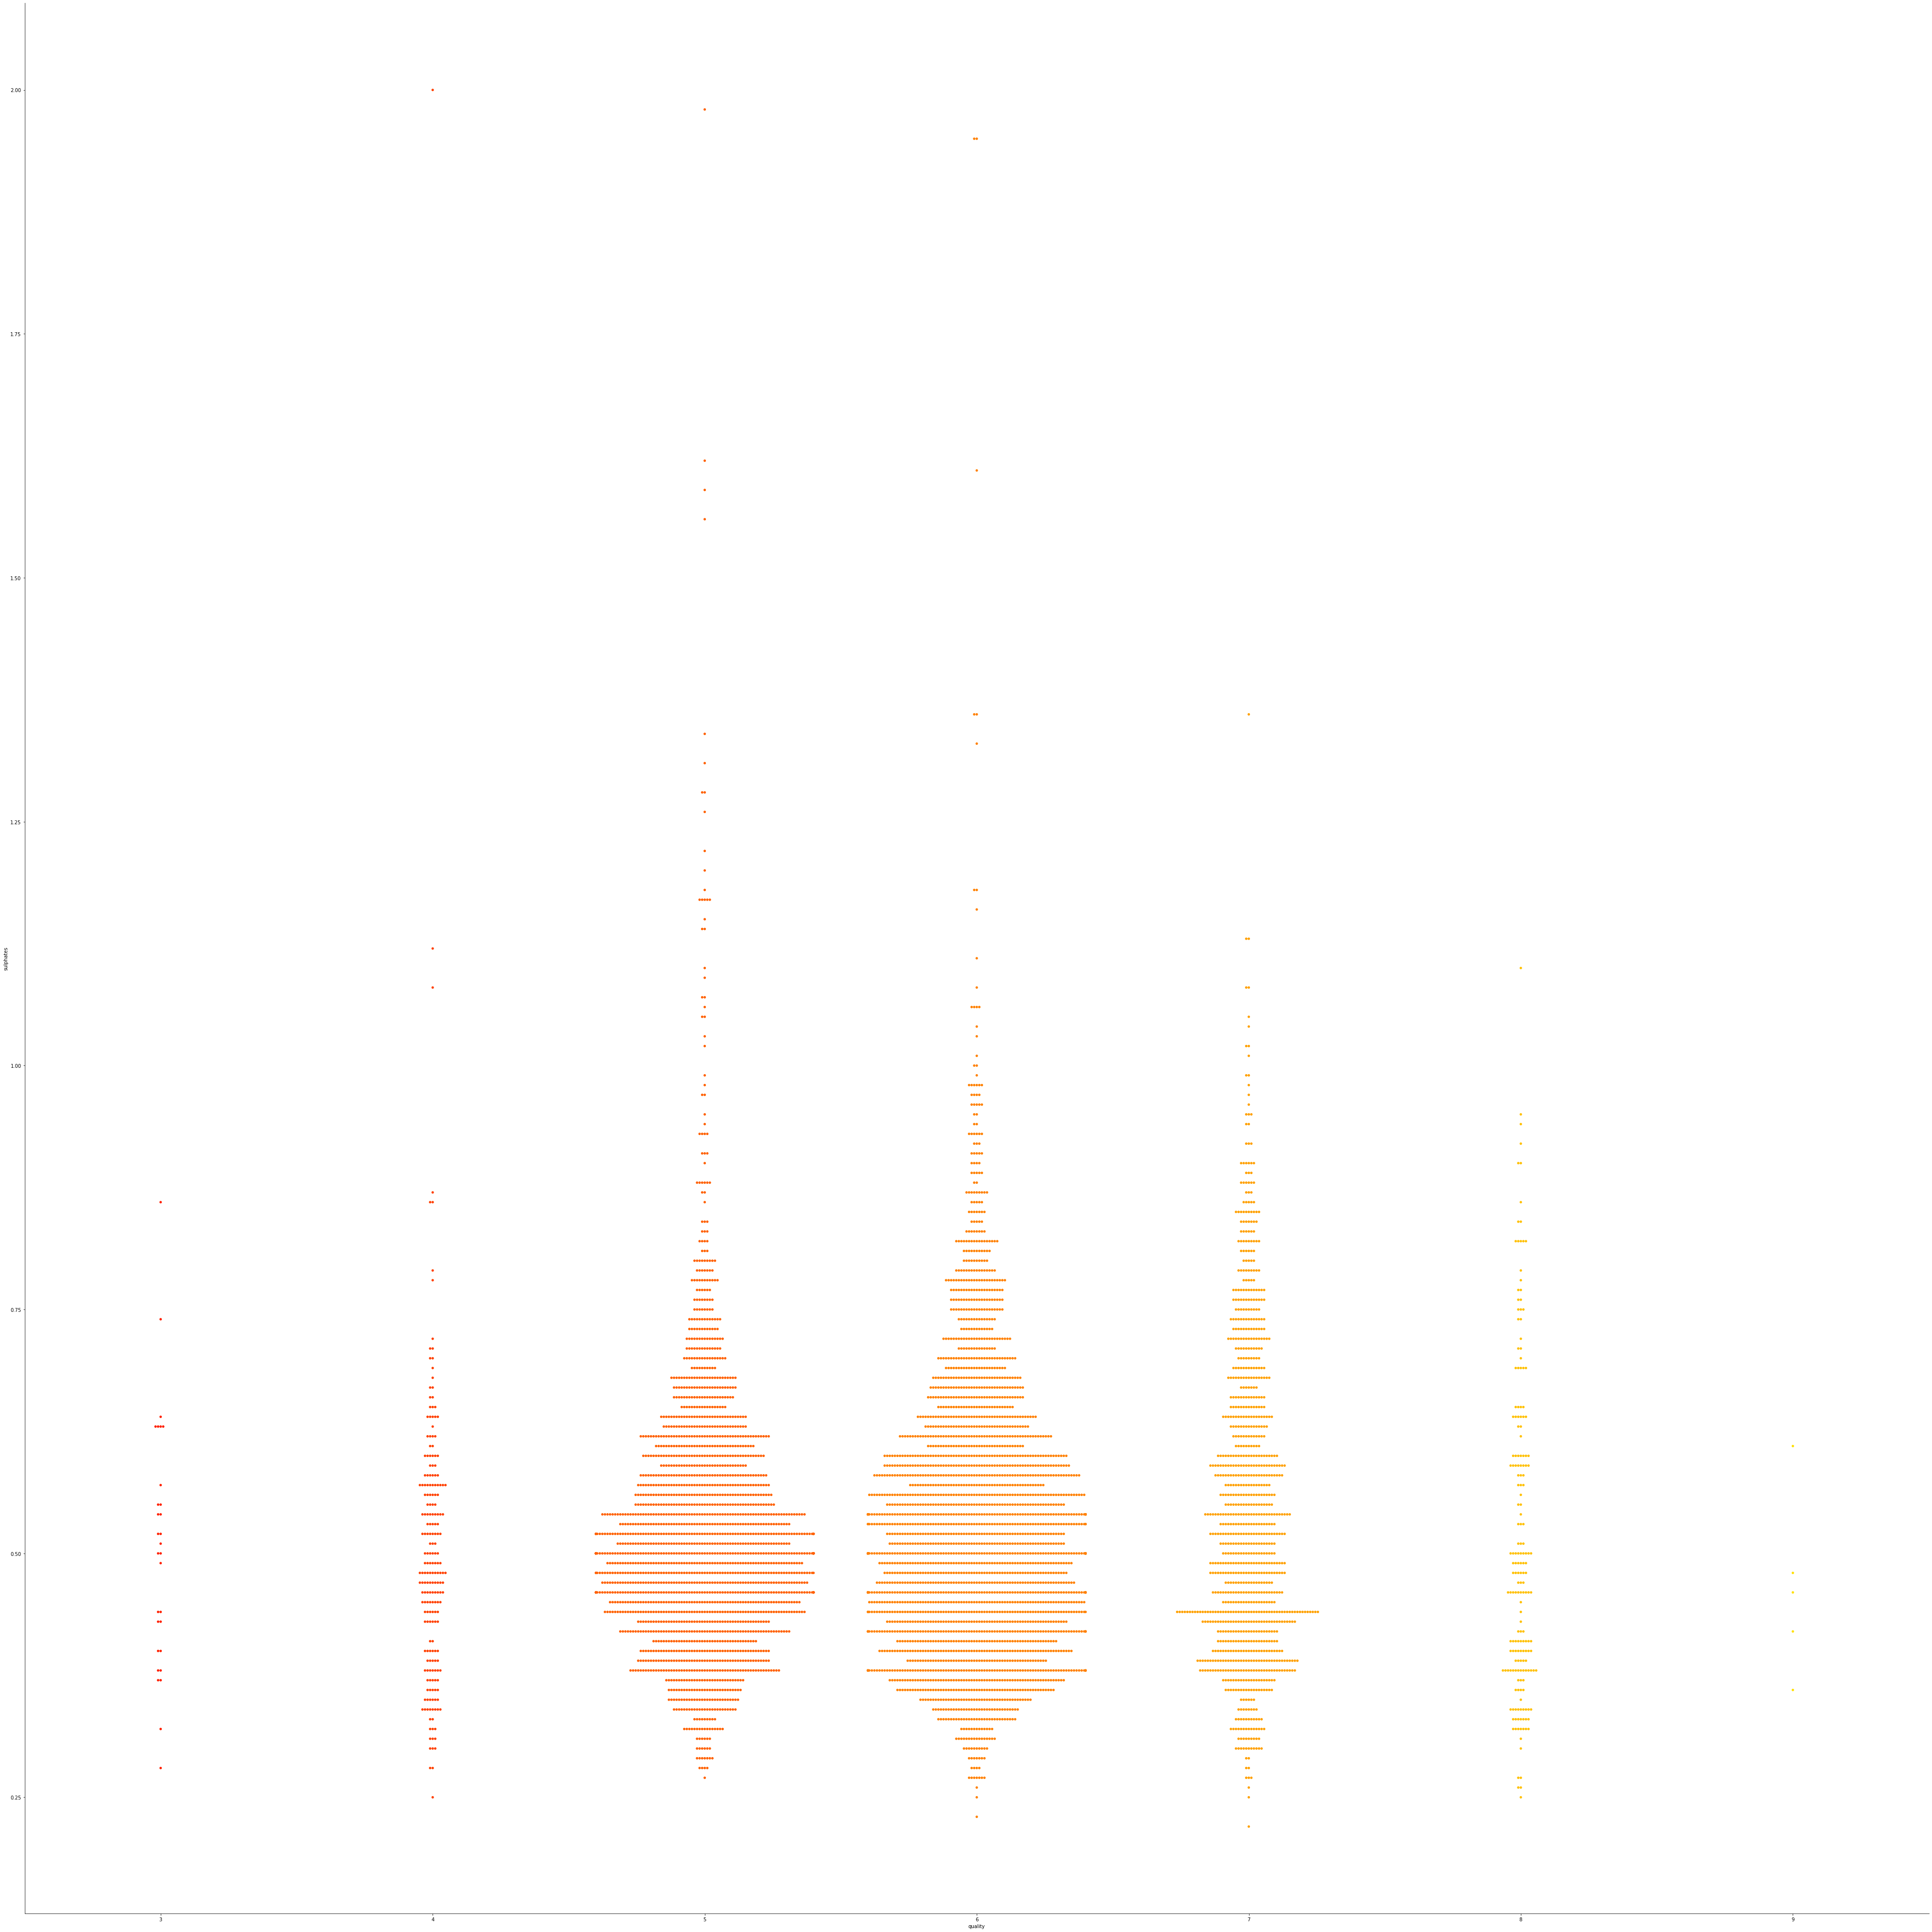

In [6]:
sns.catplot(data=df_wine, x='quality', y='sulphates', kind='swarm', height=55, palette= 'autumn')

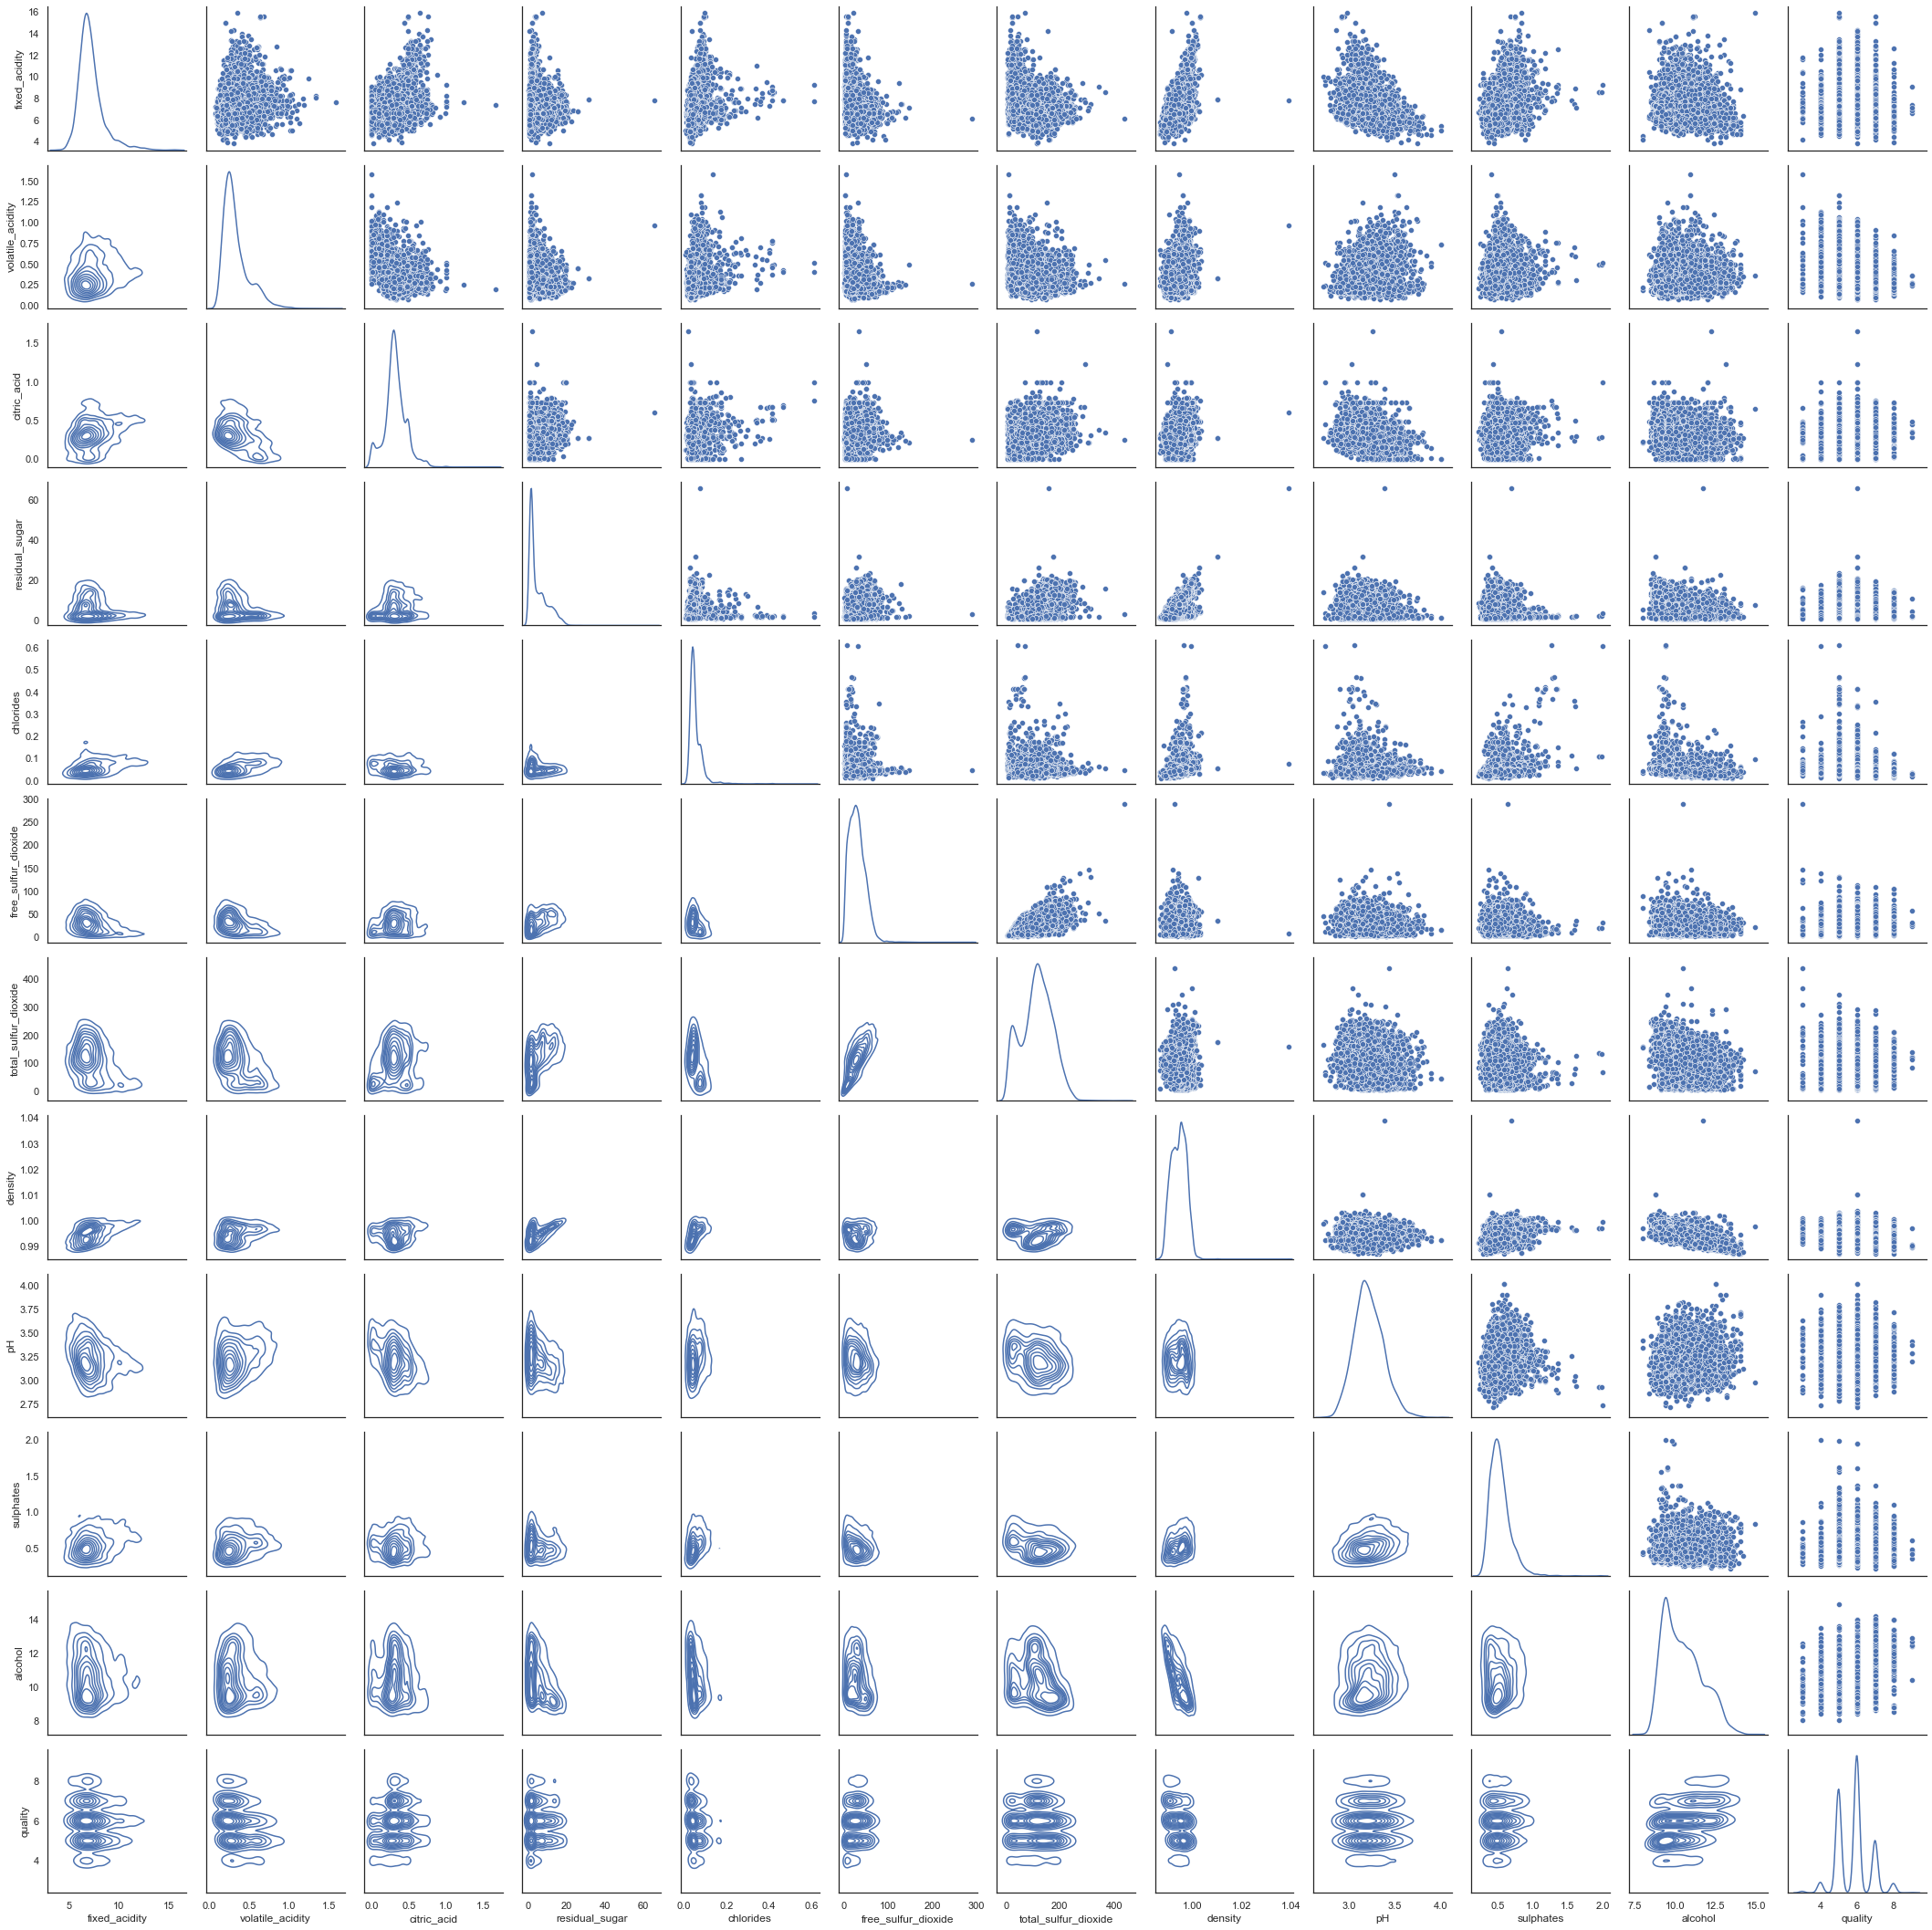

In [7]:
sns.set(style="white")

g = sns.PairGrid(df_wine, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)